## Speech Data Augmentation

In [1]:
import os
import yaml
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
from random import sample
import soundfile as sf
import scipy.io.wavfile
from src.data_aug.utils import generate_file_name, read_yaml_config, print_plot_play
from src.data_aug.audio_augmentation import Augmenter
from src.routines.augmentation import run_sequential_augmentation, run_parallel_augmentation
%matplotlib inline

### DATA AUGMENTATION
methods: 
* Stretch Time, 
* Shift Pitch, 
* Control Volume, 
* Add Noise
* Shift Time.
* Polarity Inversion
* Lowpass Filtering
* Highpass Filtering
* Bandpass Filtering
* Add Reverb

### Helper functions

In [2]:
# Check out project src

### Config

In [3]:
config = read_yaml_config(Path("src/config/config.yml"))
config

{'augmentation_job': {'approach': 'SEQ',
  'export': True,
  'paths': {'import_path': None, 'export_path': None}},
 'augmentation_approach': {'sequential': {'sequence': ['pitch_shift']},
  'parallel': {'methods': ['time_stretch',
    'pitch_shift',
    'volume_control',
    'add_noise',
    'time_shift',
    'bandpass_filter',
    'add_reverb',
    'polarity_inversion'],
   'n_methods': 8}},
 'augmentation_method': {'time_stretch': {'p': 0, 'rate': [0.8, 1.2]},
  'pitch_shift': {'p': 1,
   'sr': 22050,
   'bins_per_octave': 12,
   'n_steps': [-2, 2]},
  'volume_control': {'p': 0, 'gain_dB': [-3, 3]},
  'add_noise': {'p': 0, 'snr_db': [15, 20]},
  'time_shift': {'p': 0, 'shift_pct': [-1, 1]},
  'lowpass_filter': {'p': 0, 'lowcut': 4000},
  'highpass_filter': {'p': 0, 'highcut': 300},
  'bandpass_filter': {'p': 0,
   'lowcut': 300,
   'highcut': 4000,
   'filter_order': 5,
   'sr': 22050},
  'add_reverb': {'p': 0,
   'sr': 22050,
   'delay': 0,
   'rt60': 0.4,
   'room_dim': [6, 6, 3],
 

### Original

WAV file: boja6_6_10n.wav Fs = 22050, x.shape = (16973,), x.dtype = float32


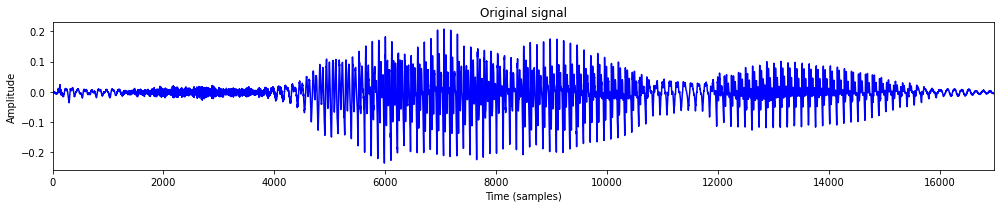

In [5]:
# Read wav
# original_fn = "broj1_2_10n.WAV"
original_fn = "boja6_6_10n.wav"
# x, Fs = librosa.load(f"data/govornik2_brojevi_n/{original_fn}", sr=None)
x, Fs = librosa.load(f"data/baza/{original_fn}", sr=None)
print_plot_play(x=x, sr=Fs, title="Original signal", text=f'WAV file: {original_fn}')

### Visualization (Spectrogram and waveform)

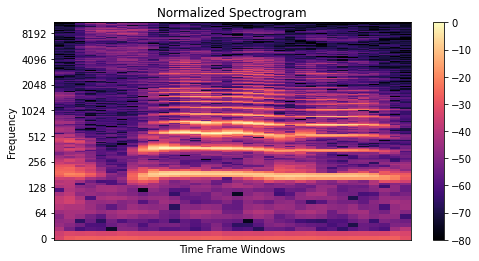

In [5]:
# Spectrogram
D = librosa.stft(x)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(8, 4))
librosa.display.specshow(data=S_db, y_axis="log")
plt.title("Normalized Spectrogram")
plt.ylabel("Frequency")
plt.xlabel('Time Frame Windows')
plt.colorbar()

Text(0.5, 15.0, 'Time')

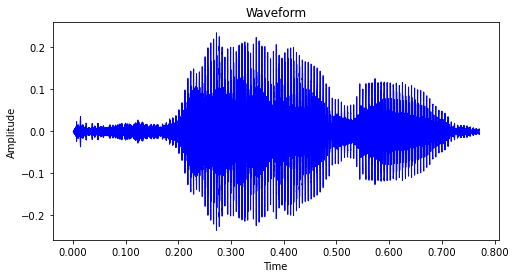

In [6]:
# waveform
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=Fs, color='b')
plt.title("Waveform")
plt.ylabel("Amplitude")
plt.xlabel('Time')

### Stretch Time

In [7]:
aug = Augmenter(input_signal=x, file_name=original_fn, config=None)

In [8]:
x_fast = aug.time_stretch(rate=2.0, p=1.)
x_slow = aug.time_stretch(rate=0.5, p=1.)

WAV file: boja6_6_10n_TST_R2.0.WAV Fs = 22050, x.shape = (8486,), x.dtype = float32


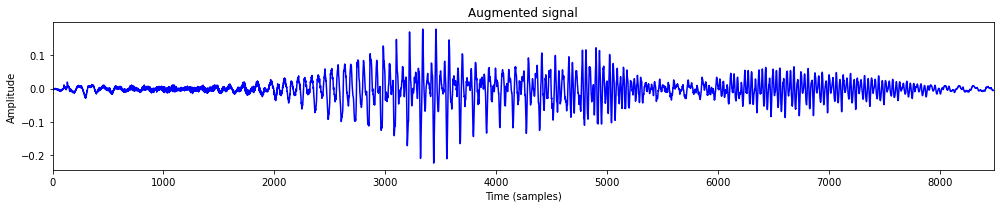

In [9]:
print_plot_play(x=x_fast, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_TST_R2.0" + ".WAV"}')

WAV file: boja6_6_10n_TST_R0.5.WAV Fs = 22050, x.shape = (33946,), x.dtype = float32


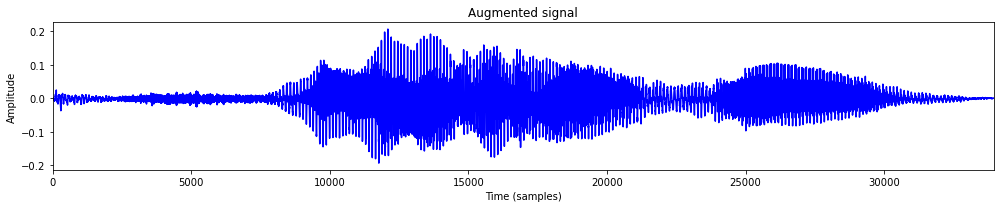

In [10]:
print_plot_play(x=x_slow, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_TST_R0.5" + ".WAV"}')

### Shift pitch

In [9]:
x_third = aug.pitch_shift(sr=Fs, bins_per_octave=12, n_steps=2, p=1)
x_tritone = aug.pitch_shift(sr=Fs, bins_per_octave=12, n_steps=-2, p=1)

WAV file: boja6_6_10n_PSH_SR22050_BPO12_N4.WAV Fs = 22050, x.shape = (16973,), x.dtype = float32


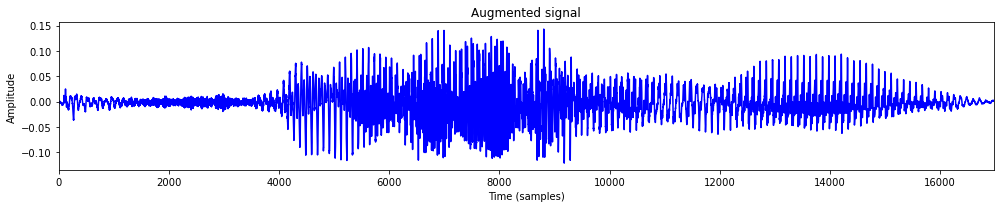

In [10]:
print_plot_play(x=x_third, sr=Fs, title="Augmented signal",  text=f'WAV file: {original_fn.split(".")[0] + "_PSH_SR22050_BPO12_N4" + ".WAV"}')

WAV file: boja6_6_10n_PSH_SR22050_N-6.WAV Fs = 22050, x.shape = (16973,), x.dtype = float32


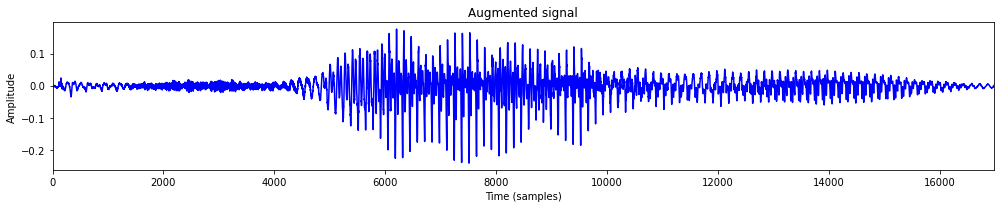

In [11]:
print_plot_play(x=x_tritone, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_PSH_SR22050_N-6" + ".WAV"}')

### Control Volume

WAV file: boja6_6_10n_VC_G10.WAV Fs = 22050, x.shape = (16973,), x.dtype = float32


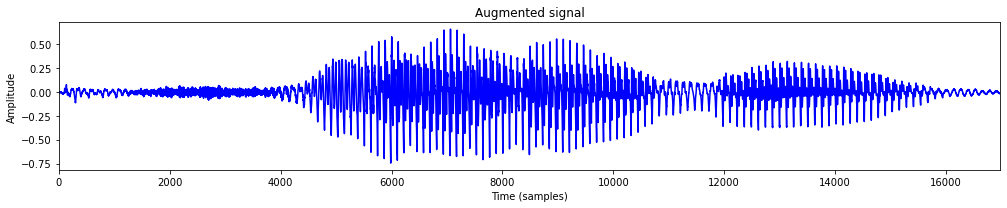

In [14]:
x_vol = aug.volume_control(gain_dB=10, p=1)
print_plot_play(x=x_vol, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_VC_G10" + ".WAV"}')

### Shift Time

WAV file: boja6_6_10n_TSH_PCT-10.WAV Fs = 22050, x.shape = (18670,), x.dtype = float32


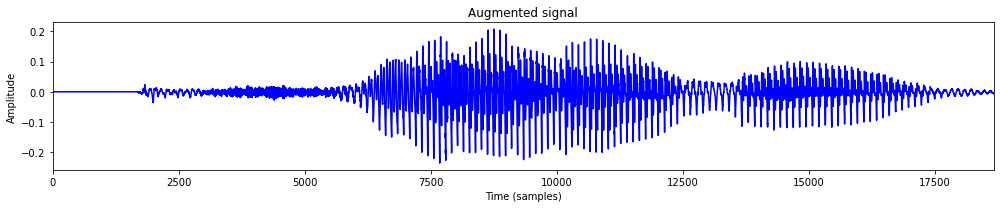

In [15]:
x_time_shift = aug.time_shift(shift_pct=10, p=1)
print_plot_play(x=x_time_shift, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_TSH_PCT-10" + ".WAV"}')

### Add Noise

WAV file: boja6_6_10n_AN_SNR20.WAV Fs = 22050, x.shape = (16973,), x.dtype = float32


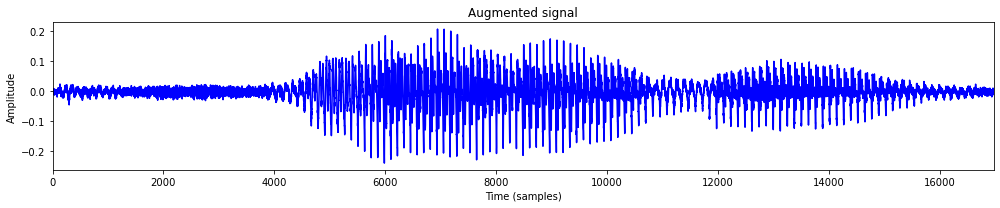

In [21]:
x_noise = aug.add_noise(snr_db=20, p=1)

print_plot_play(x=x_noise, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_AN_SNR20" + ".WAV"}')

### Polarity Inversion

WAV file: boja6_6_10n_INV.WAV Fs = 22050, x.shape = (16973,), x.dtype = float32


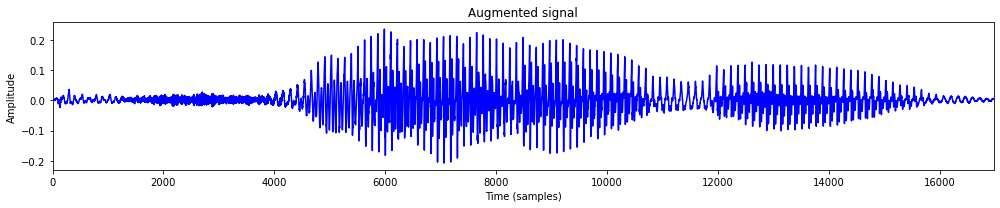

In [22]:
x_inverse = aug.polarity_inversion(p=1)

print_plot_play(x=x_inverse, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_INV" + ".WAV"}')

### Bandpass filtering

WAV file: boja6_6_10n_BPF.WAV Fs = 22050, x.shape = (16973,), x.dtype = float64


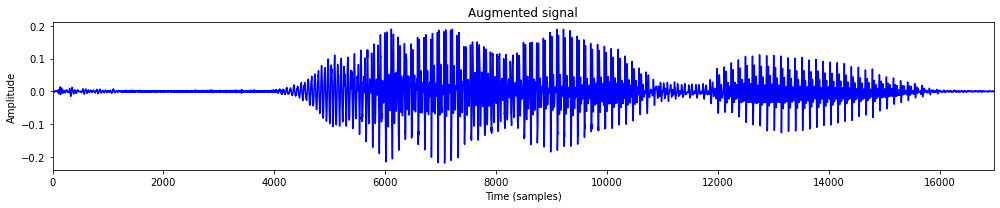

In [23]:
x_inverse = aug.bandpass_filter(lowcut=300, highcut=4000, sr=Fs, p=1)

print_plot_play(x=x_inverse, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_BPF" + ".WAV"}')

### Lowpass filtering

WAV file: boja6_6_10n_LPF.WAV Fs = 22050, x.shape = (16973,), x.dtype = float64


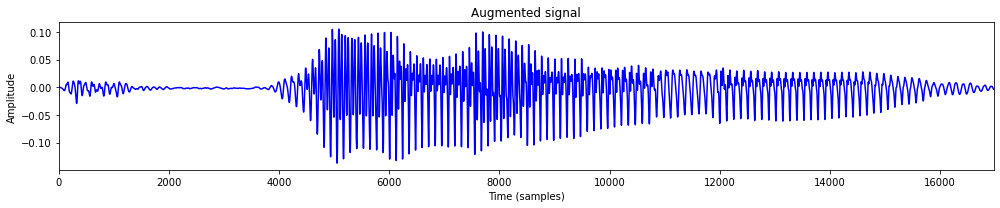

In [24]:
x_inverse = aug.lowpass_filter(lowcut=500, sr=Fs, p=1)

print_plot_play(x=x_inverse, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_LPF" + ".WAV"}')

### Highpass filtering

WAV file: boja6_6_10n_HPF.WAV Fs = 22050, x.shape = (16973,), x.dtype = float64


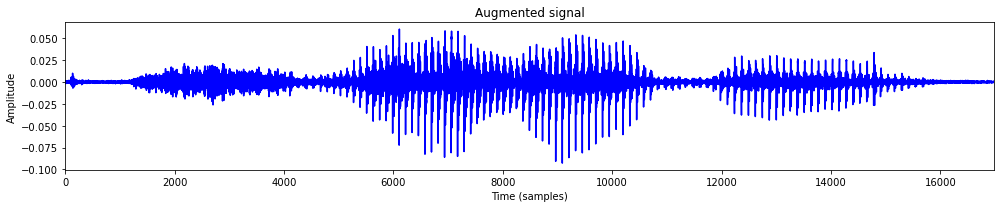

In [25]:
x_inverse = aug.highpass_filter(highcut=1000, sr=Fs, p=1)

print_plot_play(x=x_inverse, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_HPF" + ".WAV"}')

### Add reverb

WAV file: boja6_6_10n_RVR.WAV Fs = 22050, x.shape = (36752,), x.dtype = float64


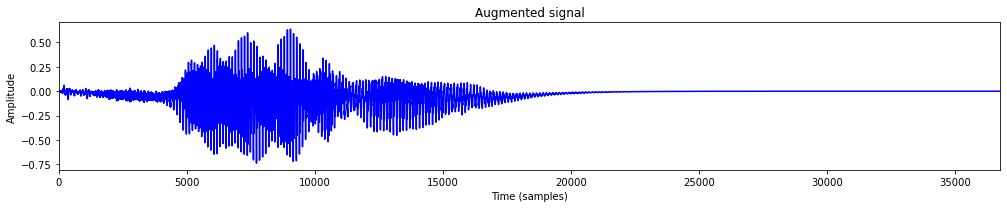

In [26]:
x_reverb = aug.add_reverb(sr=Fs, delay=0, rt60=0.4, room_dim=[6, 6, 3], src_pos=[3, 3, 1.5], mic_pos=[3, 2.6, 1.5], p=1)

print_plot_play(x=x_reverb, sr=Fs, title="Augmented signal", text=f'WAV file: {original_fn.split(".")[0] + "_RVR" + ".WAV"}')

## Sequential Augmentation

broj1_2_10n.wav Fs = 22050, x.shape = (12275,), x.dtype = float32


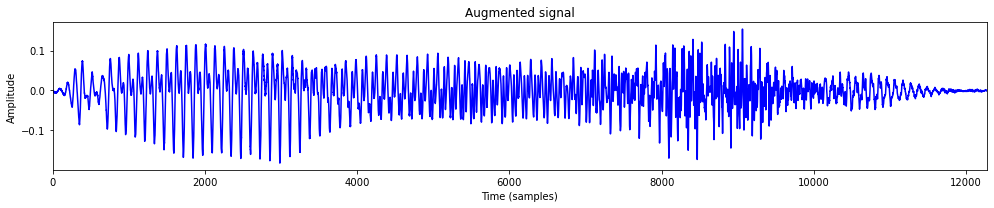

In [27]:
y, fn, _ = run_sequential_augmentation(Path(f'data/govornik2_brojevi_n/broj1_2_10n.WAV'), 
                                config, 
                                sequence=["time_stretch", "pitch_shift", "volume_control", "add_noise", "time_shift"],
                                export=True,
                                export_path=Path("/Users/djolle87/Projects/data_augmentation/data/augmented"))

print_plot_play(x=y, sr=Fs, title="Augmented signal", text=fn)

### Parallel Augmentation

broj1_2_10n.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


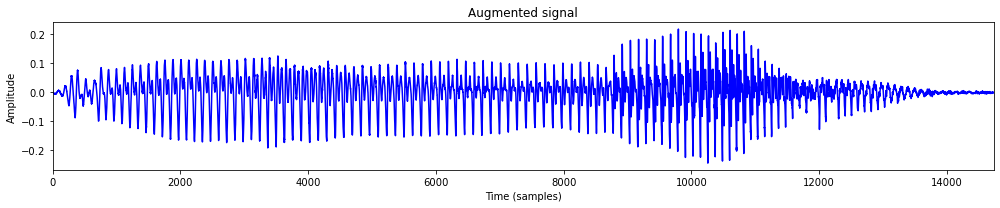

broj1_2_10n.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


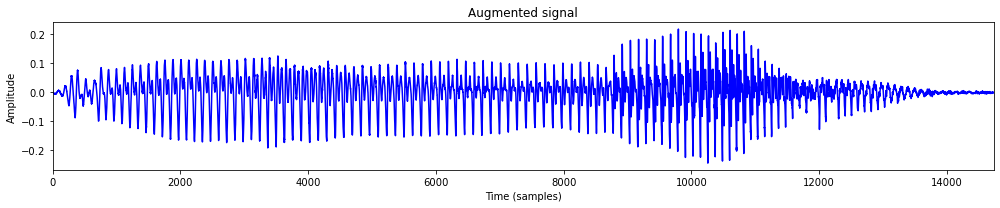

broj1_2_10n.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


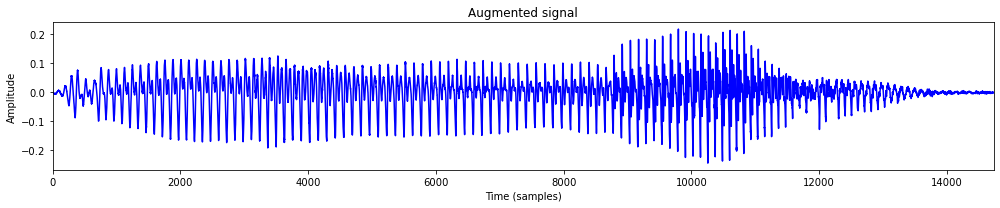

broj1_2_10n.WAV Fs = 22050, x.shape = (14730,), x.dtype = float32


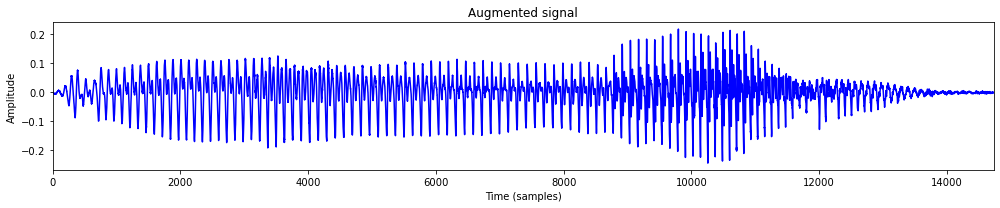

broj1_2_10n.WAV Fs = 22050, x.shape = (16367,), x.dtype = float32


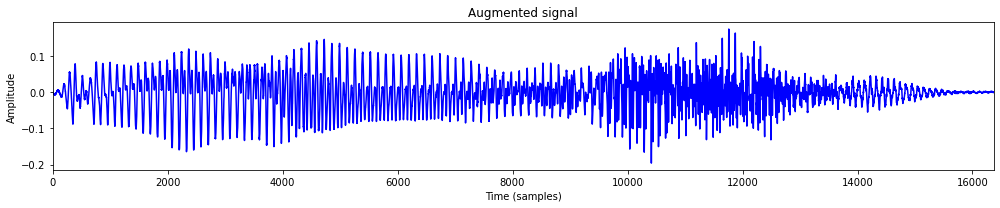

In [29]:
_ = run_parallel_augmentation(input_signal_path=Path(f'data/govornik2_brojevi_n/broj1_2_10n.WAV'),
                      config=config, 
                      methods= ["time_stretch", "pitch_shift", "volume_control", "add_noise", "time_shift"],
                      n_methods=5, 
                      export=False,)